In [ ]:
train_cats_dir = "/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/train/cats"
train_dogs_dir = '/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/train/dogs'
validation_cats_dir = '/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/validation/cats'
validation_dogs_dir = '/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/validation/dogs'
test_cats_dir = '/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/test/cats'
test_dogs_dir = '/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/test/dogs'
train_dir = '/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/train'
validation_dir = '/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/validation'

In [ ]:
import os

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D (32, (3, 3), activation='relu',input_shape=(50, 50, 3)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(50, 50),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(50, 50),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#Data Augmentation

In [ ]:
# train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,
#                                    shear_range=0.2,zoom_range=0.2,horizontal_flip=True,)
# test_datagen = ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

# validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

# history = model.fit_generator(train_generator, steps_per_epoch=100,epochs=100, validation_data=validation_generator, validation_steps=50)

In [ ]:
# datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2, zoom_range=0.2, 
#                              horizontal_flip=True, fill_mode='nearest')

In [ ]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

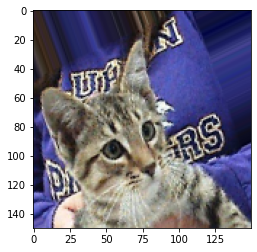

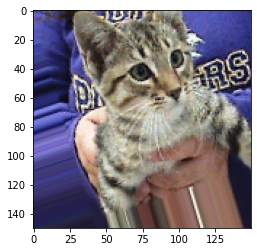

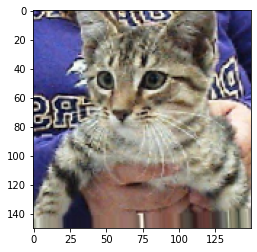

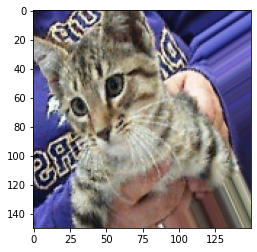

In [ ]:
#from matplotlib.pyplot import plt
import matplotlib.pyplot as plt
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[4]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break
plt.show()

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
100/100 [==============================] - 342s 3s/step - loss: 0.6926 - acc: 0.5085 - val_loss: 0.6892 - val_acc: 0.6020
Epoch 2/10
100/100 [==============================] - 16s 161ms/step - loss: 0.6858 - acc: 0.5645 - val_loss: 0.6785 - val_acc: 0.5880
Epoch 3/10
100/100 [==============================] - 16s 163ms/step - loss: 0.6754 - acc: 0.5940 - val_loss: 0.6666 - val_acc: 0.6040
Epoch 4/10
100/100 [==============================] - 16s 161ms/step - loss: 0.6605 - acc: 0.6130 - val_loss: 0.6534 - val_acc: 0.6200
Epoch 5/10
100/100 [==============================] - 16s 161ms/step - loss: 0.6482 - acc: 0.6325 - val_loss: 0.6507 - val_acc: 0.6240
Epoch 6/10
100/100 [==============================] - 16s 160ms/step - loss: 0.6376 - acc: 0.6345 - val_loss: 0.6460 - val_acc: 0.6290
Epoch 7/10
100/100 [==============================] - 16s 162ms/step - loss: 0.6268 - acc: 0.6520 - val_loss: 0.6343 - val_acc: 0.6450
Epoch 8/10
100/100 [==============================] - 16s

In [ ]:
model.save('cats_and_dogs_small_1.h5')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
img = plt.imread("/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/test/cats/cat.1500.jpg")

In [ ]:
import os
#import cv2
import numpy as np
from keras.preprocessing import image
import tensorflow as tf

model = tf.keras.models.load_model('cats_and_dogs_small_1.h5')
c = 1
path = '/content/drive/MyDrive/Notes/Machine Learning/Deep Learning/CNN/cats_and_dogs_small/test/dogs/dog.1500.jpg'
# for imag in os.listdir(path):  # iterate over each image per dogs and cats


# for imag in os.listdir(path):  # iterate over each image per dogs and cats

img = image.load_img(path, target_size=(50, 50))
x = image.img_to_array(img)
x = x / 255
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images)
#print(c)
if classes[0] > 0.5:
    print(" is dog")
else:
    print(" is a cat")
c += 1